In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors  
import csv
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.offsetbox import AnchoredText
get_ipython().run_line_magic('matplotlib', 'inline')
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
from analysis_script import *
%matplotlib inline 

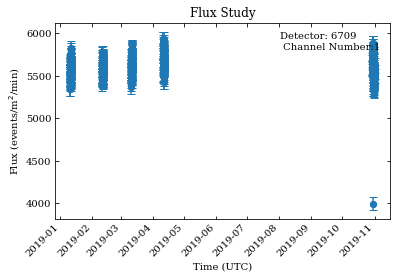

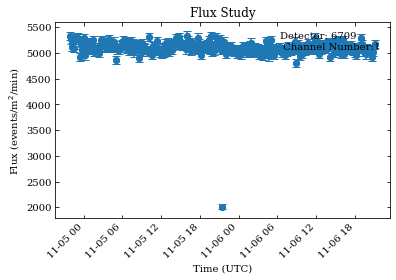

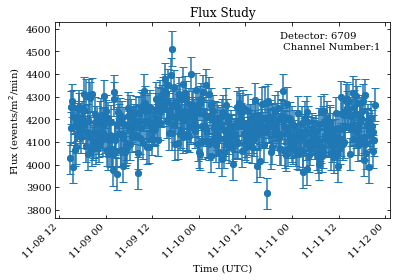

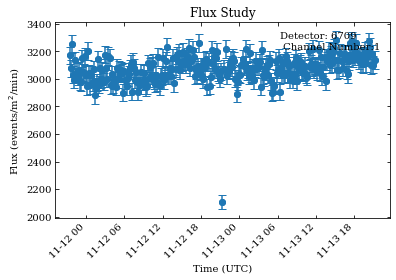

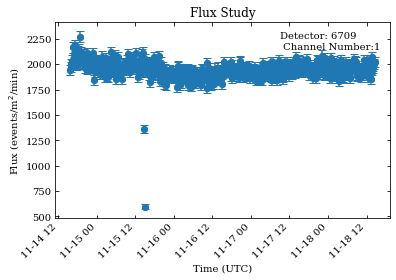

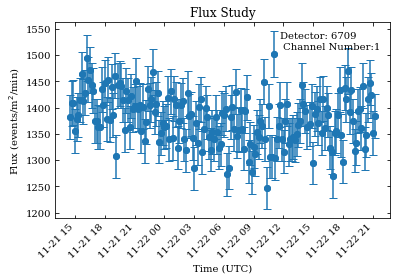

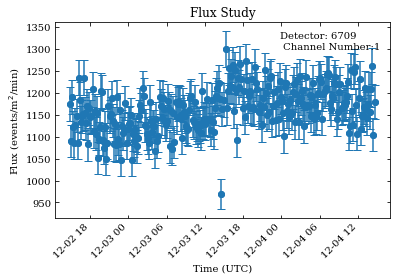

In [66]:
flux_0, error_0 = scatter_flux('0_angle_data.csv')
flux_0 = [float(f) for f in flux_0]
error_0 = [float(f) for f in error_0]

flux_15, error_15 = scatter_flux('15_angle_data.csv')
flux_15 = [float(f) for f in flux_15]
error_15 = [float(f) for f in error_15]

flux_30, error_30 = scatter_flux('30_angle_data_fix.csv')
flux_30 = [float(f) for f in flux_30]
error_30 = [float(f) for f in error_30]

flux_45, error_45 = scatter_flux('45_angle_data.csv')
flux_45 = [float(f) for f in flux_45]
error_45 = [float(f) for f in error_45]

flux_60, error_60 = scatter_flux('60_angle_data.csv')
flux_60 = [float(f) for f in flux_60]
error_60 = [float(f) for f in error_60]

flux_75, error_75 = scatter_flux('75_angle_data_fix.csv')
flux_75 = [float(f) for f in flux_75]
error_75 = [float(f) for f in error_75]

flux_90, error_90 = scatter_flux('90_angle_data.csv')
flux_90 = [float(f) for f in flux_90]
error_90 = [float(f) for f in error_90]

angles =  [0, 15, 30, 45, 60, 75, 90]

fluxs =  [flux_0, flux_15, flux_30, flux_45,  flux_60,  flux_75,  flux_90] 
errs = [error_0, error_15, error_30, error_45, error_60, error_75, error_90]

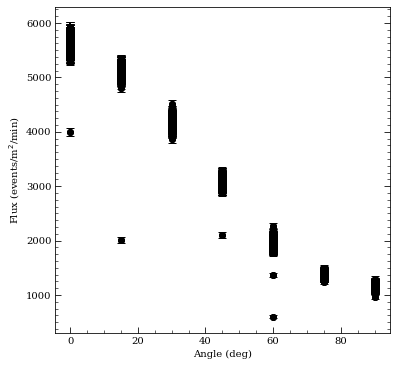

In [67]:
fig, ax = plt.subplots(figsize=(6,6))
plt.rc("font",family='serif')

for xe, ye, ee in zip(angles, fluxs, errs):
    ax.scatter([xe] * len(ye), ye,color='black')
    ax.errorbar([xe] * len(ye), ye, yerr=ee, fmt='o', capsize=4,color='black')
ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Flux (events/m$^2$/min)')
#ax.set_title('Muon Flux Variation Across Angle of QUACRD')
ax.tick_params(which='major',axis='both',direction='in',length=6,right=True)
XminorLocator = MultipleLocator(5)
YminorLocator = MultipleLocator(125)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,right=True)
plt.savefig('all_angle.pdf')
plt.show()

In [68]:
#convert to float
flux_all = []
for f in flux_0:
    flux_all.append(float(f))
for f in flux_15:
    flux_all.append(float(f))
for f in flux_30:
    flux_all.append(float(f))
for f in flux_45:
    flux_all.append(float(f))
for f in flux_60:
    flux_all.append(float(f))
for f in flux_75:
    flux_all.append(float(f))
    
error_all = []
for f in error_0:
    error_all.append(float(f))
for f in error_15:
    error_all.append(float(f))
for f in error_30:
    error_all.append(float(f))
for f in error_45:
    error_all.append(float(f))
for f in error_60:
    error_all.append(float(f))
for f in error_75:
    error_all.append(float(f))

In [69]:
from scipy.optimize import curve_fit

angles =  []

z = 0
while z < len(flux_0):
    angles.append(0)
    z += 1
f = 0
while f < len(flux_15):
    angles.append(15)
    f += 1
t = 0
while t < len(flux_30):
    angles.append(30)
    t += 1
fo = 0
while fo < len(flux_45):
    angles.append(45)
    fo += 1
s = 0
while s < len(flux_60):
    angles.append(60)
    s += 1
se = 0
while se < len(flux_75):
    angles.append(75)
    se += 1
ni = 0

rad_angles = [a * (np.pi / 180) for a in angles]
rad_angles = np.array(rad_angles)

remove_outlier(flux_0, error_0)
remove_outlier(flux_15, error_15)
remove_outlier(flux_30, error_30)
remove_outlier(flux_45, error_45)
remove_outlier(flux_60, error_60)
remove_outlier(flux_75, error_75)

def objective(angle, I, n):
    return I * (np.cos(angle)**(n))

def schwerdt(angle, A, B, C, D):
    return (A * (np.cos(B*angle + C))**2) + D

def shukla(angle, f, m):
    return f * (np.sqrt(30276*np.cos(angle)**2 + 349) - 174*np.cos(angle))**(-1*m+1)

popt, var = curve_fit(objective, rad_angles, flux_all, p0=[4266, 2], sigma = error_all, maxfev = 8000)
I, n = popt

mod_popt, mod_var = curve_fit(schwerdt, rad_angles, flux_all, p0=[2500, 1, 0, 500], sigma = error_all, maxfev = 8000)#[1000, 0, 4266]
A, B, C, D = mod_popt

s_popt, s_var = curve_fit(shukla, rad_angles, flux_all, p0=[4266, 3], sigma = error_all, maxfev = 8000)
f, m = s_popt

#covariance matrix

#one std errors of parameters
perr = np.sqrt(np.diag(var))

d = abs((n - 2) / 2)

mod_perr = np.sqrt(np.diag(mod_var))

fit = objective(rad_angles, I, n)
schwerdt_fit = schwerdt(rad_angles, A, B, C, D)
ideal = objective(rad_angles, I, 2)
s_fit = shukla(rad_angles, f, m)

x = np.arange(0, 90, 0.1)
#y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_ideal = I * (np.cos(x * np.pi/180)**2)
#y_fit = A + B * (np.cos(x * np.pi/180)**n)
y_fit = I * (np.cos(x * np.pi/180)**n)
y_schwerdt = (A * np.cos(B*(x*np.pi/180) + C)**2) + D
y_s = f * (np.sqrt(30276*np.cos(x * np.pi/180)**2 + 349) - 174*np.cos(x * np.pi/180))**(-1*(m-1))

In [70]:
angles =  [0, 15, 30, 45, 60, 75]

#remove_outlier(flux_90, error_90)

fluxs =  [flux_0, flux_15, flux_30, flux_45,  flux_60,  flux_75] 
errs = [error_0, error_15, error_30, error_45, error_60, error_75]

#get x and y data
x = np.arange(0, 75, 0.1)
#y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_ideal = I * (np.cos(x * np.pi/180)**2)
#y_fit = A + B * (np.cos(x * np.pi/180)**n)
y_fit = I * (np.cos(x * np.pi/180)**n)
#y_mod = A + B * (np.cos(x * np.pi/180)**p)
y_s = f * (np.sqrt(30276*np.cos(x * np.pi/180)**2 + 349) - 174*np.cos(x * np.pi/180))**(-1*(m-1))
y_schwerdt = (A * np.cos(B*(x*np.pi/180) + C)**2) + D

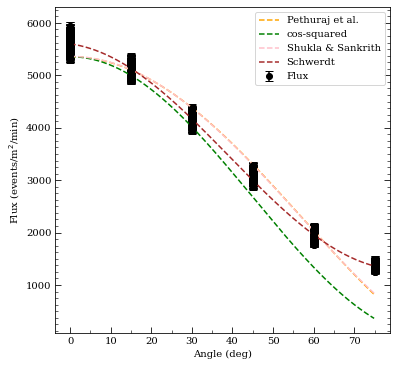

In [71]:
fig, ax = plt.subplots(figsize=(6,6))

#plot model and fit
for xe, ye, ee in zip(angles, fluxs, errs):
    ax.scatter([xe] * len(ye), ye, color='black')
    ax.errorbar([xe] * len(ye), ye, yerr=ee, fmt='o', capsize=4, color='black')
    if xe == 75:
        ax.errorbar([xe] * len(ye), ye, yerr=ee, fmt='o', capsize=4, color='black',label='Flux')

ax.plot(x, y_fit, linestyle='dashed', label='Pethuraj et al.',c='orange')
ax.plot(x,y_ideal, c='green', linestyle='dashed', label='cos-squared')
ax.plot(x, y_s, linestyle='dashed', label='Shukla & Sankrith',c='pink')
ax.plot(x, y_schwerdt, linestyle='dashed', label='Schwerdt',c='brown')

ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Flux (events/m$^2$/min)')
ax.legend()
#ax.set_title('Comparison of Muon Flux Models as a Function of Angle')
ax.tick_params(which='major',axis='both',direction='in',length=6,right=True)
XminorLocator = MultipleLocator(5)
YminorLocator = MultipleLocator(125)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,right=True)
plt.savefig('flux_comp.pdf')
plt.show()